(method)=
# Method

This chapter describes the generation of the data sets and the analysis logic of our research. As described in [](methodological-approach), [](proposition-2-1-method) and [](proposition-2-2-method) of the AMUSE model were simulated using LLMs.

(proposition-2-1-method)=
## Proposition 2.1

Proposition 2.1 suggests that individuals with high SSC exhibit an enhanced ability of downgrading their emotional responses to external stimuli compared to those with low SSC{cite}`reinecke2021media`. The initial paper referenced several experiments which concluded in this proposition. The following paragraphs describe the conducted experiments and how they were reproduced in our research using LLMs. 

Researchers {cite}`muraven1998self` have demonstrated that individuals with low SSC produce stronger affective reactions to humorous media content relative to those with high SSC. In their study, participants were primed to either possess high or low SSC, exposing them to comedic videos while instructing them to restrain their emotional expressions during facial recording. The number of smiles and laughs was counted by raters who also provided a general rating of the participant's success in controlling emotions. To replicate this experiment utilizing LLMs, we leveraged the search terms `#skit #funny` and `#standupcomedy` to retrieve YouTube Shorts. Eighty-nine video descriptions were obtained, serving as input for our LLM simulation. We employed the [](methodological-approach) outlined earlier to prepare the LLM and requested ratings from it for each designated individual. Following prompt was used to replicate the described experiment:
```text
You are watching a YouTube short and while you are watching the video, you try to hide your emotions to outside people. The YouTube short is described as follows:

<YouTube Short description of LLM>

You should output the number of your smiles and laughs while watching the video and should rate your overall externally visible amusement between 1 to 5. Output only the three fields in JSON only. Your answer must not include any further text or explanations.
```
Consequently, the LLM generated a JSON object for each query, resulting in a comprehensive dataset. An exemplary JSON output is illustrated below:
```json
{
    "smiles": 3,
    "laughs": 5,
    "amusement_rating": 2
}
```

According to research conducted by {cite}`schmeichel2007attention`, individuals with high SSC demonstrate superior capability in suppressing emotional expressions when exposed to disturbing videos, such as gruesome video clips, compared to those with low SSC. This finding was derived from an experiment where participants were first primed with varying levels of SSC through memory tasks, then presented with a gruesome video, and subsequently evaluated for their emotional states via self-reported ratings on a 1-5 scale for feelings of depression, tension, sadness, dissatisfaction, and anxiety. Additionally, trained judges assessed the visibility of their emotions on a 1-111 scale. To replicate this study using LLMs, we collected 96 YouTube Shorts employing the search terms `slaughterhouse #brutal` and `slaughter brutal`. Following the same methodology as described in [](methodological-approach), the LLM was prepared and tasked with generating ratings for each individual as follows:

```text
You are watching a YouTube short and while you are watching the video, you try to hide your emotions to outside people. The YouTube short is described as follows:

<YouTube Short description of LLM>

You should rate between 1 to 5 how depressed, tense, sorry, dissatisfied, and anxious you felt. Also provide a number between 1 to 111 how much your emotions were visible to outside persons. Output all six fields in JSON with the field names "depressed", "tense", "sorry", "dissatisfied", "anxious" and "emotions_visible". Your answer must not include any further text or explanations.
```
An exemplary JSON output is illustrated below:
```json
{
    "depressed": 3,
    "tense": 5,
    "sorry": 2,
    "dissatisfied": 3,
    "anxious": 5,
    "emotion_visibility": 20
}
```


Stucke & Baumeister{cite}`stuckeEgoDepletionAggressive2006` investigate the relationship between SSC and aggressive behavior. In three experiments, the they demonstrated, that individuals with high SSC, whether by resisting tempting food, concentrating on a boring film, or unrelated acts of self-regulation, tend to exhibit increased aggression when faced with subsequent challenges or insults. The Researchers measured the aggression indirectly on a 9 point scale utilizing proxies like the evaluation of the experimenter. In order to replicate those results the LLM was confronted with 47 provocative Youtube Shorts obtained with the Search Term `Provocation` and asked to rate their emotional response to the provocative content. The exact prompt (excluding the SSC definitions) was constructed like this:

```text
You are watching a YouTube short and while you are watching the video, you try to hide your emotions to outside people. The YouTube short is described as follows:

<YouTube Short description of LLM>

You should rate your emotional response in terms of aggression (JSON Field: "aggression") from 1 (not at all) to 9 (extremely). Output the field in JSON only. Your answer must not include any further text or explanations.
```
With an example response of:
```json
{
    "aggression": 3,
}
```

(proposition-2-2-method)=
## Proposition 2.2

Proposition 2.2 suggests that prioritization of short-term mood regulation versus long-term goals is affected by self-control{cite}`reinecke2021media`. Several studies are referenced in the initial paper which allow the derivation of this proposition. In the paragraphs below, the experiments are described as well as the the methods we used to reproduce the results using LLMs. 

Researchers {cite}`johnson2015self` have shown that individuals with reduced SSC experience higher levels of enjoyment to the narrative of a short-story. The authors suggest that participants with depleted SSC increase their goal-conduciveness of short-term mood regulation goals to experience higher levels of entertainment. In the experiment, participants were prepared to possess different levels of SSC before exposing them to the narrative of a short-story. Afterwards, the participants were asked to rate their experience by providing a 1-5 rating for following attributes: enjoyment, fun, moving, impression, suspense, transportation, and identification. To replicate this experiment, we collected 100 YouTube Shorts by employing the search term `english short story`. Following the methodology described in [](methodological-approach), the LLM was prepared to represent an individual with varying levels of SSC and tasked with generating the ratings as follows:

```text
You are watching a youtube short. The YouTube short is described as follows:

<YouTube Short description of LLM>

You should rate between 1 (very slightly/not at all) to 5 (extremely) how much enjoyment, fun, moving, impression, suspense, transportation, identification you felt. Output the seven fields in JSON only. Your answer must not include any further text or explanations.
```

Below, an exemplary JSON output is illustrated:
```
{
    "enjoyment": 3,
    "fun": 2,
    "moving": 4,
    "impression": 5,
    "suspense": 1,
    "transportation": 3,
    "identification": 2
}
```

## Used Software Packages & Functions

This chapter gives insight into the code that was used to collect the datasets and to analyze the data. The following code is an excerpt of the total code that was produced and provides an exemplary insight into the logic of the simulation. 

(data-collection)=
### Data Collection

For extracting the YouTube Shorts, a script was created that queries the YouTube API. Since this script is very large, it is not included into this paper. However, it can be found in our repository[^3]. Our main dependencies used were `hugchat`[^4], `google-api-python-client`[^5], and `youtube-transcript-api`[^6].

For simulating the experiments, the code below was used. Functions like `st_provocation_low_ssc_characteristics` and `st_funny_low_ssc_characteristics` returned the promt text described in [](proposition-2-1-method) and [](proposition-2-2-method). By calling the functions `query_st_funny` and `query_st_provocation`, the data collection process is triggered which queries *HuggingChat* for every short in batches of 10. 

```python
import json
from hugchat import hugchat
from hugchat.login import Login
import pandas as pd
import time
from tqdm import tqdm

# credentials
with open('client_secrets.json', 'r') as file:
    secrets = json.load(file)

# Set up the API key
login = secrets['huggingLogin']
password = secrets['huggingPassword']

def get_llm_descriptions(df_shorts, output_csv):

    # Process the DataFrame in batches of 20 and write to the CSV file
    process_in_batches(df_shorts, 10, output_csv, chatbot)
    
    return

def get_chatbot_summary(row):
    sign = Login(login, password)
    cookies = sign.login()

    # Save cookies to the local directory
    cookie_path_dir = "./cookies_snapshot"
    sign.saveCookiesToDir(cookie_path_dir)

    chatbot = hugchat.ChatBot(cookies=cookies.get_dict())  # or cookie_path="usercookies/<email>.json"
    #Cast to String for regex, since query returns Message object
    time.sleep(10)
    low_ssc_characteristics = str(chatbot.query(row['low ssc characteristics st']))
    time.sleep(10)
    high_ssc_characteristics = str(chatbot.query(row['high ssc characteristics st']))
    time.sleep(10)
    low_ssc_defined = str(chatbot.query(row['low ssc defined st']))
    time.sleep(10)
    high_ssc_defined = str(chatbot.query(row['high ssc defined st']))
    return low_ssc_characteristics, high_ssc_characteristics, low_ssc_defined, high_ssc_defined

# Process the DataFrame in batches and update the DataFrame
def process_in_batches(dataframe, batch_size, output_csv):
    for start in range(0, len(dataframe), batch_size):
        end = min(start + batch_size, len(dataframe))
        batch = dataframe.iloc[start:end]

        with tqdm(total=len(batch), desc=f"Processing Batch {start}-{end}") as pbar:
            try:
                # Process each row and update the DataFrame
                for i, row in batch.iterrows():
                    dataframe.at[i, 'low ssc characteristics'],dataframe.at[i, 'high ssc characteristics'],dataframe.at[i, 'low ssc defined'],dataframe.at[i, 'high ssc defined'] = get_chatbot_summary(row)
                    pbar.update(1)  # Update the batch progress bar

                # Overwrite the CSV file with the current state of the DataFrame
                dataframe.iloc[:end].to_csv(output_csv, index=False)

                print(f"Batch {start} to {end} processed successfully")
            
            except Exception as e:
                print(f"Error processing batch {start} to {end}: {e}")
                time.sleep(60)  # Sleep timer for rate limiting
                process_in_batches(dataframe.iloc[start:], batch_size, output_csv)  # Restart from the current batch
                break

def query_st_funny():
    # input
    YOUTUBE_SHORTS_WITH_CHATBOT_SUMMARY_FUNNY = "csv/output/Report_Shorts_with_summary_gregor_funny.csv"
    CHATBOT_EXPERIMENT_RESPONSE_FUNNY = "csv/output/Report_Shorts_with_summary_gregor_funny_experiment_results.csv"
    
    # load shorts information
    df_shorts = pd.read_csv(YOUTUBE_SHORTS_WITH_CHATBOT_SUMMARY_FUNNY, sep=",")

    # Apply the function to each row
    df_shorts['low ssc characteristics st'] = df_shorts.apply(st_funny_low_ssc_characteristics, axis=1)
    df_shorts['high ssc characteristics st'] = df_shorts.apply(st_funny_high_ssc_characteristics, axis=1)
    df_shorts['low ssc defined st'] = df_shorts.apply(st_funny_low_ssc_defined, axis=1)
    df_shorts['high ssc defined st'] = df_shorts.apply(st_funny_high_ssc_defined, axis=1)

    # Process the DataFrame in batches of 10 and write to the CSV file
    process_in_batches(df_shorts, 10, CHATBOT_EXPERIMENT_RESPONSE_FUNNY)
    
    return

def query_st_provocation():
    # input
    YOUTUBE_SHORTS_WITH_CHATBOT_SUMMARY_PROVOCATION = "csv\output\Report_Shorts_with_summary_stefan_provocation.csv"
    CHATBOT_EXPERIMENT_RESPONSE_PROVOCATION = "csv\output\Report_Shorts_with_summary_stefan_provocation_experimentResults.csv"
    
    # load shorts information
    df_shorts = pd.read_csv(YOUTUBE_SHORTS_WITH_CHATBOT_SUMMARY_PROVOCATION, sep=",")

    # Apply the function to each row
    df_shorts['low ssc characteristics st'] = df_shorts.apply(st_provocation_low_ssc_characteristics, axis=1)
    df_shorts['high ssc characteristics st'] = df_shorts.apply(st_provocation_high_ssc_characteristics, axis=1)
    df_shorts['low ssc defined st'] = df_shorts.apply(st_provocation_low_ssc_defined, axis=1)
    df_shorts['high ssc defined st'] = df_shorts.apply(st_provocation_high_ssc_defined, axis=1)

    # Process the DataFrame in batches of 10 and write to the CSV file
    process_in_batches(df_shorts, 10, CHATBOT_EXPERIMENT_RESPONSE_PROVOCATION)
    
    return
```

### Data Analysis

In the following, our approaches to the analysis of the generated data (see [](data-collection)) is lined out by providing the scripts for analysis of two exemplary experiment simulations.

#### Example: Funny / Humorous

We extracted the JSON objects from the CSV file and calculated the median for every value category. Afterwards, matplotlib was used to generate the graphs.

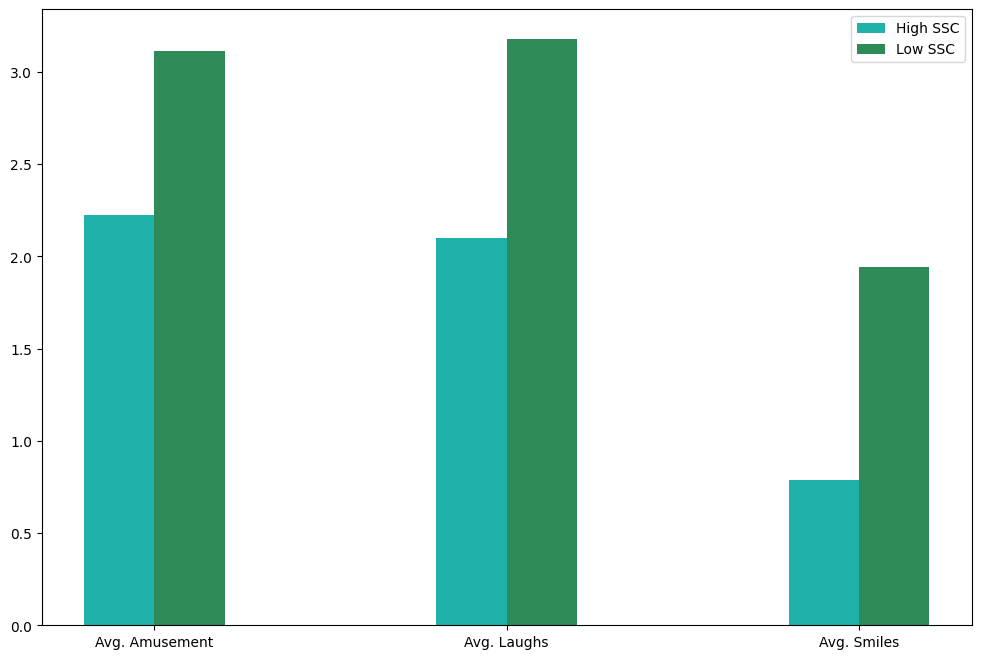

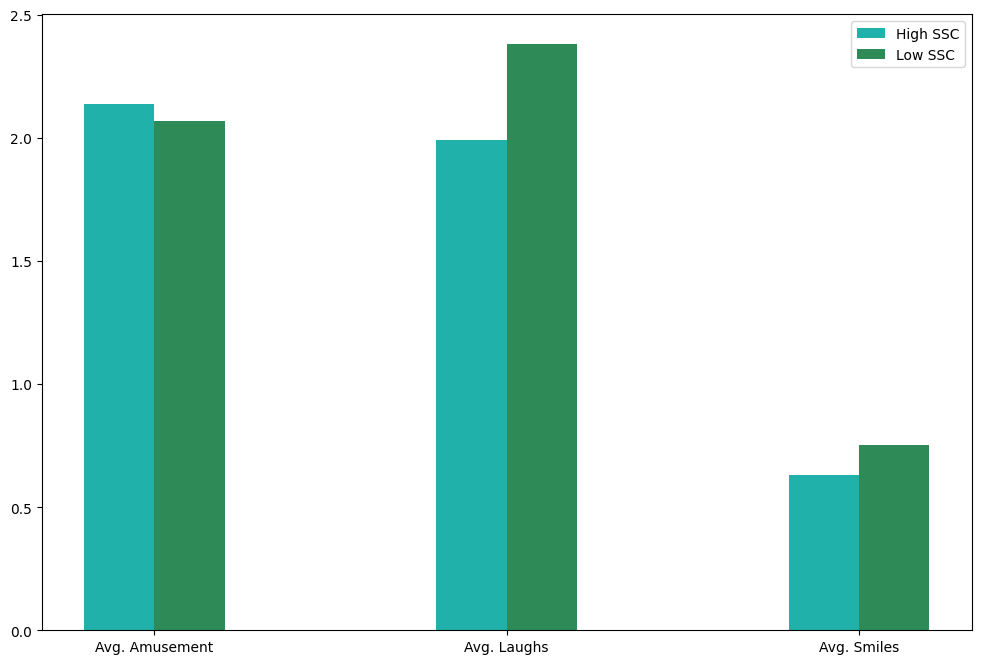

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import numpy as np

RESULTS_FUNNY = "files_for_python_code/Report_Shorts_with_summary_gregor_funny_experiment_results_cleaned.csv"

df_shorts = pd.read_csv(RESULTS_FUNNY, sep=",")

results = {}
results['low_ssc_characteristics'] = []
results['high_ssc_characteristics'] = []
results['low_ssc_defined'] = []
results['high_ssc_defined'] = []

total_laugh_low_ssc_characteristics = 0
total_smile_low_ssc_characteristics = 0
total_amusement_low_ssc_characteristics = 0

total_laugh_high_ssc_characteristics = 0
total_smile_high_ssc_characteristics = 0
total_amusement_high_ssc_characteristics = 0

total_laugh_low_ssc_defined = 0
total_smile_low_ssc_defined = 0
total_amusement_low_ssc_defined = 0

total_laugh_high_ssc_defined = 0
total_smile_high_ssc_defined = 0
total_amusement_high_ssc_defined = 0

for index, row in df_shorts.iterrows():
    results['low_ssc_characteristics'].append(json.loads(row['low ssc characteristics']))
    results['high_ssc_characteristics'].append(json.loads(row['high ssc characteristics']))
    results['low_ssc_defined'].append(json.loads(row['low ssc defined']))
    results['high_ssc_defined'].append(json.loads(row['high ssc defined']))

for i in range(0,len(results['low_ssc_characteristics'])):
    total_laugh_low_ssc_characteristics += results['low_ssc_characteristics'][i]["smiles"]
    total_smile_low_ssc_characteristics += results['low_ssc_characteristics'][i]["laughs"]
    total_amusement_low_ssc_characteristics += results['low_ssc_characteristics'][i]["amusement_rating"]
    
    total_laugh_high_ssc_characteristics += results['high_ssc_characteristics'][i]["smiles"]
    total_smile_high_ssc_characteristics += results['high_ssc_characteristics'][i]["laughs"]
    total_amusement_high_ssc_characteristics += results['high_ssc_characteristics'][i]["amusement_rating"]
    
    total_laugh_low_ssc_defined += results['low_ssc_defined'][i]["smiles"]
    total_smile_low_ssc_defined += results['low_ssc_defined'][i]["laughs"]
    total_amusement_low_ssc_defined += results['low_ssc_defined'][i]["amusement_rating"]
    
    total_laugh_high_ssc_defined += results['high_ssc_defined'][i]["smiles"]
    total_smile_high_ssc_defined += results['high_ssc_defined'][i]["laughs"]
    total_amusement_high_ssc_defined += results['high_ssc_defined'][i]["amusement_rating"]

avg_laugh_low_ssc_characteristics = total_laugh_low_ssc_characteristics/len(results['low_ssc_characteristics'])
avg_smile_low_ssc_characteristics = total_smile_low_ssc_characteristics/len(results['low_ssc_characteristics'])
avg_amusement_low_ssc_characteristics = total_amusement_low_ssc_characteristics/len(results['low_ssc_characteristics'])

avg_laugh_high_ssc_characteristics = total_laugh_high_ssc_characteristics/len(results['low_ssc_characteristics'])
avg_smile_high_ssc_characteristics = total_smile_high_ssc_characteristics/len(results['low_ssc_characteristics'])
avg_amusement_high_ssc_characteristics = total_amusement_high_ssc_characteristics/len(results['low_ssc_characteristics'])

avg_laugh_low_ssc_defined = total_laugh_low_ssc_defined/len(results['low_ssc_characteristics'])
avg_smile_low_ssc_defined = total_smile_low_ssc_defined/len(results['low_ssc_characteristics'])
avg_amusement_low_ssc_defined = total_amusement_low_ssc_defined/len(results['low_ssc_characteristics'])

avg_laugh_high_ssc_defined = total_laugh_high_ssc_defined/len(results['low_ssc_characteristics'])
avg_smile_high_ssc_defined = total_smile_high_ssc_defined/len(results['low_ssc_characteristics'])
avg_amusement_high_ssc_defined = total_amusement_high_ssc_defined/len(results['low_ssc_characteristics'])

x = np.arange(3)
y1 = [avg_amusement_high_ssc_characteristics, avg_laugh_high_ssc_characteristics, avg_smile_high_ssc_characteristics]
y2 = [avg_amusement_low_ssc_characteristics, avg_laugh_low_ssc_characteristics, avg_smile_low_ssc_characteristics]
width = 0.2

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(x-0.1,y1, width, color='lightseagreen')
plt.bar(x+0.1,y2, width, color='seagreen')
plt.xticks(x, ['Avg. Amusement', 'Avg. Laughs', 'Avg. Smiles'])
plt.legend(["High SSC", "Low SSC "])
plt.show()

x = np.arange(3)
y1 = [avg_amusement_high_ssc_defined, avg_laugh_high_ssc_defined, avg_smile_high_ssc_defined]
y2 = [avg_amusement_low_ssc_defined, avg_laugh_low_ssc_defined, avg_smile_low_ssc_defined]
width = 0.2

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(x-0.1,y1, width, color='lightseagreen')
plt.bar(x+0.1,y2, width, color='seagreen')
plt.xticks(x, ['Avg. Amusement', 'Avg. Laughs', 'Avg. Smiles'])
plt.legend(["High SSC", "Low SSC "]) 
plt.show()

#### Example: Aggression / Provocation

We used regex to match the JSON, since the columns sometimes included additional text, despite our efforts in the prompt to prevent this.
Then we used standard pandas functionality to extract the integers out of the JSON. After that matplotlib was utilized to plot the boxplots
and calculate everything associated with it (mean, IQR, ...)

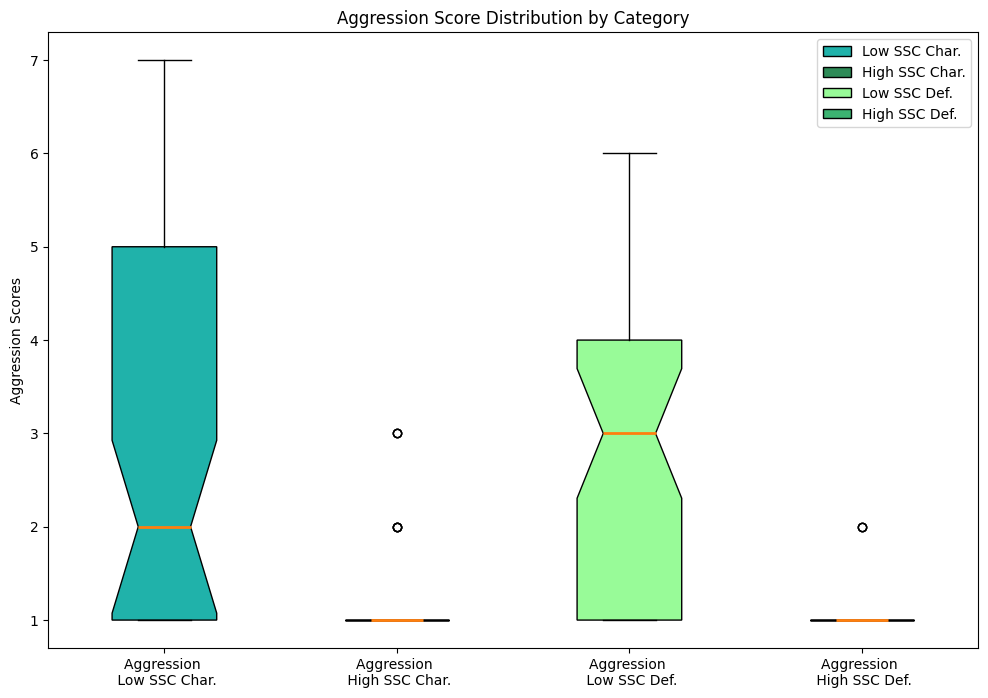

In [2]:
import pandas as pd
df = pd.read_csv("files_for_python_code/Report_Shorts_with_summary_stefan_provocation_experimentResults.csv")

import json
import re
def extract_json(row):
    try:
        # Find the first JSON-like structure in the row
        match = re.search(r'{.*?}', row)
        if match:
            json_str = match.group()
            return json.loads(json_str)  
    except json.JSONDecodeError:
        return None
    return None

# Apply the function to all Json Columns
df['low ssc defined'] = df['low ssc defined'].apply(extract_json)
df['high ssc defined'] = df['high ssc defined'].apply(extract_json)
df['low ssc characteristics'] = df['low ssc characteristics'].apply(extract_json)
df['high ssc characteristics'] = df['high ssc characteristics'].apply(extract_json) 

#Extract the aggression value from the JSON
df['low ssc characteristics'] = df['low ssc characteristics'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)
df['high ssc characteristics'] = df['high ssc characteristics'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)
df['low ssc defined'] = df['low ssc defined'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)
df['high ssc defined'] = df['high ssc defined'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)

import matplotlib.pyplot as plt

columns_to_plot = ['low ssc characteristics', 'high ssc characteristics', 'low ssc defined', 'high ssc defined']

data_to_plot = [df[col].dropna() for col in columns_to_plot]
fig, ax = plt.subplots(figsize=(12, 8))  
bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, medianprops={'linewidth': 2})

# Colors and labels for the legend
colors = ['lightseagreen', 'seagreen', 'palegreen', 'mediumseagreen']
labels = ['Low SSC Char.', 'High SSC Char.', 'Low SSC Def.', 'High SSC Def.']

for patch, color, label in zip(bp['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)

ax.legend(loc='upper right')

ax.set_xticklabels(['Aggression \n Low SSC Char.', 'Aggression \n High SSC Char.', 'Aggression \n Low SSC Def.', 'Aggression \n High SSC Def.'])
ax.set_ylabel('Aggression Scores')
ax.set_title('Aggression Score Distribution by Category')

plt.show()

[^1]: <https://huggingface.co/chat/>
[^2]: <https://developers.google.com/youtube/v3/docs>
[^3]: <https://github.com/StayFN/MediaReactionSimulator/blob/main/DescribeYoutubeShorts.ipynb>
[^4]: <https://pypi.org/project/hugchat/>
[^5]: <https://googleapis.github.io/google-api-python-client/>
[^6]: <https://pypi.org/project/youtube-transcript-api/>